<a href="https://colab.research.google.com/github/ManuelBagasina/DATCapstone/blob/Ri-on/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
#Clone git for data
# !git clone https://github.com/ManuelBagasina/DATCapstone.git

In [116]:
!pip install transformers torch

# Preprocessing

In [117]:
import pandas as pd

# File paths
files = {
    "stock": "/content/DATCapstone/data/AAPL_stock.csv",
    "micro": "/content/DATCapstone/data/AAPL_micro.csv",
    "macro": "/content/DATCapstone/data/AAPL_macro.csv",
    "articles": "/content/DATCapstone/data/AAPL_articles.csv",
    "reddit": "/content/DATCapstone/data/AAPL_reddit.csv"
}

# Load the data into dataframes
dfs = {name: pd.read_csv(path) for name, path in files.items()}

# Convert date columns to datetime format
dfs["stock"]["Date"] = pd.to_datetime(dfs["stock"]["Unnamed: 0"])
dfs["micro"]["Date"] = pd.to_datetime(dfs["micro"]["Unnamed: 0"])
dfs["macro"]["Date"] = pd.to_datetime(dfs["macro"]["Unnamed: 0"])
dfs["articles"]["Date"] = pd.to_datetime(dfs["articles"]["time"], errors='coerce', utc=True).dt.tz_convert(None).dt.date
dfs["reddit"]["Date"] = pd.to_datetime(dfs["reddit"]["Unnamed: 0"])

# Drop unnecessary columns
dfs = {key: df.drop(columns=["Unnamed: 0", "time"], errors="ignore") for key, df in dfs.items()}

### Macroeconomic Data

In [118]:
dfs['macro'].sort_values('Date', inplace = True)
dfs["macro"].ffill(inplace=True)
dfs["macro"].dropna(inplace=True)
# Resample macroeconomic data to daily frequency using forward fill
dfs["macro"] = dfs["macro"].set_index("Date").resample("D").ffill().reset_index()
dfs["macro"]

,Date,GDP (Billions USD),Unemployment Rate (%),Producer Price Index (PPI),Retail Sales (Millions USD),Industrial Production Index,Housing Starts (Thousands),Personal Consumption Expenditures (PCE),Trade Balance (Billions USD),M2 Money Supply (Billions USD),Consumer Confidence Index
0,1992-01-01,6363.102,7.3,115.600,164095.0,61.4823,1176.0,4084.7,-2026.0,3367.7,67.5
1,1992-01-02,6363.102,7.3,115.600,164095.0,61.4823,1176.0,4084.7,-2026.0,3367.7,67.5
2,1992-01-03,6363.102,7.3,115.600,164095.0,61.4823,1176.0,4084.7,-2026.0,3367.7,67.5
3,1992-01-04,6363.102,7.3,115.600,164095.0,61.4823,1176.0,4084.7,-2026.0,3367.7,67.5
4,1992-01-05,6363.102,7.3,115.600,164095.0,61.4823,1176.0,4084.7,-2026.0,3367.7,67.5
...,...,...,...,...,...,...,...,...,...,...,...
12050,2024-12-28,29700.580,4.1,253.590,730300.0,102.9833,1515.0,20387.2,-98431.0,19363.4,74.0
12051,2024-12-29,29700.580,4.1,253.590,730300.0,102.9833,1515.0,20387.2,-98431.0,19363.4,74.0
12052,2024-12-30,29700.580,4.1,253.590,730300.0,102.9833,1515.0,20387.2,-98431.0,19363.4,74.0
12053,2024-12-31,29700.580,4.1,253.590,730300.0,102.9833,1515.0,20387.2,-98431.0,19363.4,74.0


### Microeconomic Data

In [119]:
dfs['micro'].sort_values('Date', inplace = True)
dfs["micro"].ffill(inplace=True)
dfs['micro'].reset_index(drop = True, inplace = True)
dfs['micro'].drop(0, axis = 0, inplace = True)
# Resample macroeconomic data to daily frequency using forward fill
dfs["micro"] = dfs["micro"].set_index("Date").resample("D").ffill().reset_index()

# Expand Dataframe ~ 2024-12-31
last_date = dfs["micro"]["Date"].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), end="2024-12-31", freq="D")
future_df = pd.DataFrame({"Date": future_dates})

# Original dataframe + Expanded dataframe
dfs["micro"] = pd.concat([dfs["micro"], future_df], ignore_index=True)

# Forward Fill
dfs["micro"].ffill(inplace=True)

dfs["micro"]

,Date,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Net Interest Income,...,Change In Inventory,Change In Receivables,Changes In Account Receivables,Other Non Cash Items,Stock Based Compensation,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Net Income From Continuing Operations
0,2021-09-30,0.0,0.133,1.231360e+11,9.468000e+10,1.128400e+10,2.129810e+11,1.231360e+11,1.118520e+11,198000000.0,...,-2.642000e+09,-1.402800e+10,-1.012500e+10,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10
1,2021-10-01,0.0,0.133,1.231360e+11,9.468000e+10,1.128400e+10,2.129810e+11,1.231360e+11,1.118520e+11,198000000.0,...,-2.642000e+09,-1.402800e+10,-1.012500e+10,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10
2,2021-10-02,0.0,0.133,1.231360e+11,9.468000e+10,1.128400e+10,2.129810e+11,1.231360e+11,1.118520e+11,198000000.0,...,-2.642000e+09,-1.402800e+10,-1.012500e+10,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10
3,2021-10-03,0.0,0.133,1.231360e+11,9.468000e+10,1.128400e+10,2.129810e+11,1.231360e+11,1.118520e+11,198000000.0,...,-2.642000e+09,-1.402800e+10,-1.012500e+10,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10
4,2021-10-04,0.0,0.133,1.231360e+11,9.468000e+10,1.128400e+10,2.129810e+11,1.231360e+11,1.118520e+11,198000000.0,...,-2.642000e+09,-1.402800e+10,-1.012500e+10,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,2024-12-27,0.0,0.241,1.346610e+11,9.373600e+10,1.144500e+10,2.103520e+11,1.346610e+11,1.232160e+11,-183000000.0,...,-1.046000e+09,-5.144000e+09,-3.788000e+09,-2.266000e+09,1.168800e+10,8.950000e+08,8.950000e+08,1.144500e+10,1.144500e+10,9.373600e+10
1185,2024-12-28,0.0,0.241,1.346610e+11,9.373600e+10,1.144500e+10,2.103520e+11,1.346610e+11,1.232160e+11,-183000000.0,...,-1.046000e+09,-5.144000e+09,-3.788000e+09,-2.266000e+09,1.168800e+10,8.950000e+08,8.950000e+08,1.144500e+10,1.144500e+10,9.373600e+10
1186,2024-12-29,0.0,0.241,1.346610e+11,9.373600e+10,1.144500e+10,2.103520e+11,1.346610e+11,1.232160e+11,-183000000.0,...,-1.046000e+09,-5.144000e+09,-3.788000e+09,-2.266000e+09,1.168800e+10,8.950000e+08,8.950000e+08,1.144500e+10,1.144500e+10,9.373600e+10
1187,2024-12-30,0.0,0.241,1.346610e+11,9.373600e+10,1.144500e+10,2.103520e+11,1.346610e+11,1.232160e+11,-183000000.0,...,-1.046000e+09,-5.144000e+09,-3.788000e+09,-2.266000e+09,1.168800e+10,8.950000e+08,8.950000e+08,1.144500e+10,1.144500e+10,9.373600e+10


### Merge: Stock + Macro + Micro

In [120]:
#Merging
merged_df = dfs['stock'].merge(dfs['macro'], on='Date', how='inner')
merged_df = merged_df.merge(dfs['micro'], on = 'Date', how = 'inner')
merged_df.set_index('Date', inplace = True)
merged_df.reset_index(inplace = True)

# Date Filtering
start_date = "2021-09-30"
end_date = "2024-12-31"

SMM_df = merged_df[(merged_df["Date"] >= start_date) & (merged_df["Date"] <= end_date)]

SMM_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,GDP (Billions USD),Unemployment Rate (%),...,Change In Inventory,Change In Receivables,Changes In Account Receivables,Other Non Cash Items,Stock Based Compensation,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Net Income From Continuing Operations
0,2021-09-30,140.983639,141.690227,138.647974,138.863876,89056700,0.0,0.0,23921.991,4.7,...,-2.642000e+09,-1.402800e+10,-1.012500e+10,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10
1,2021-10-01,139.256465,140.257467,136.518448,139.992493,94639600,0.0,0.0,24777.038,4.5,...,-2.642000e+09,-1.402800e+10,-1.012500e+10,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10
2,2021-10-04,139.119068,139.560697,135.694095,136.547882,98322000,0.0,0.0,24777.038,4.5,...,-2.642000e+09,-1.402800e+10,-1.012500e+10,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10
3,2021-10-05,136.891371,139.590139,136.763788,138.481186,80861100,0.0,0.0,24777.038,4.5,...,-2.642000e+09,-1.402800e+10,-1.012500e+10,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10
4,2021-10-06,136.871718,139.501783,135.792205,139.354584,83221100,0.0,0.0,24777.038,4.5,...,-2.642000e+09,-1.402800e+10,-1.012500e+10,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,2024-12-24,255.209412,257.926411,255.009620,257.916443,23234700,0.0,0.0,29700.580,4.1,...,-1.046000e+09,-5.144000e+09,-3.788000e+09,-2.266000e+09,1.168800e+10,8.950000e+08,8.950000e+08,1.144500e+10,1.144500e+10,9.373600e+10
814,2024-12-26,257.906429,259.814335,257.347047,258.735504,27237100,0.0,0.0,29700.580,4.1,...,-1.046000e+09,-5.144000e+09,-3.788000e+09,-2.266000e+09,1.168800e+10,8.950000e+08,8.950000e+08,1.144500e+10,1.144500e+10,9.373600e+10
815,2024-12-27,257.546826,258.415896,252.782075,255.309296,42355300,0.0,0.0,29700.580,4.1,...,-1.046000e+09,-5.144000e+09,-3.788000e+09,-2.266000e+09,1.168800e+10,8.950000e+08,8.950000e+08,1.144500e+10,1.144500e+10,9.373600e+10
816,2024-12-30,251.952985,253.221595,250.474615,251.923019,35557500,0.0,0.0,29700.580,4.1,...,-1.046000e+09,-5.144000e+09,-3.788000e+09,-2.266000e+09,1.168800e+10,8.950000e+08,8.950000e+08,1.144500e+10,1.144500e+10,9.373600e+10


### Articles

In [121]:
#Articles sentiment ont hot encoding
dfs['articles'] = dfs['articles'][['Date', 'sentiment']]
dfs['articles'] = pd.get_dummies(dfs['articles'], columns = ['sentiment'])
dfs['articles'] = dfs['articles'].groupby('Date').sum()
dfs['articles'].rename(columns=lambda x: f"articles_{x}", inplace=True)
dfs['articles'].reset_index(inplace = True)
dfs['articles']['Date'] = pd.to_datetime(dfs['articles']['Date'])
dfs['articles'].head()

,Date,articles_sentiment_Negative,articles_sentiment_Neutral,articles_sentiment_Positive
0,2020-03-18,3,9,12
1,2020-03-19,2,6,5
2,2020-03-20,4,12,5
3,2020-03-21,0,1,2
4,2020-03-22,1,3,3


##### Merge: Articles

In [122]:
#Merging
merged_df = merged_df.merge(dfs['articles'], on = 'Date', how = 'left')
merged_df.set_index('Date', inplace = True)
merged_df.reset_index(inplace = True)
merged_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,GDP (Billions USD),Unemployment Rate (%),...,Other Non Cash Items,Stock Based Compensation,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Net Income From Continuing Operations,articles_sentiment_Negative,articles_sentiment_Neutral,articles_sentiment_Positive
0,2021-09-30,140.983639,141.690227,138.647974,138.863876,89056700,0.0,0.0,23921.991,4.7,...,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10,1,2,1
1,2021-10-01,139.256465,140.257467,136.518448,139.992493,94639600,0.0,0.0,24777.038,4.5,...,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10,2,4,4
2,2021-10-04,139.119068,139.560697,135.694095,136.547882,98322000,0.0,0.0,24777.038,4.5,...,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10,4,0,8
3,2021-10-05,136.891371,139.590139,136.763788,138.481186,80861100,0.0,0.0,24777.038,4.5,...,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10,2,1,3
4,2021-10-06,136.871718,139.501783,135.792205,139.354584,83221100,0.0,0.0,24777.038,4.5,...,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10,5,1,2


### Reddit

In [123]:
from transformers import pipeline

# Load FinBERT sentiment analysis model
sentiment_pipeline = pipeline("text-classification", model="ProsusAI/finbert")

Device set to use cuda:0


In [124]:
import pandas as pd
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
import torch

# Load FinBERT model and tokenizer
model_name = "ProsusAI/finbert"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load dataset
df = dfs["reddit"].copy()

# Define function for sentiment analysis with truncation
def batch_sentiment_analysis(texts):
    # Ensure texts are strings & replace NaN with "Neutral"
    texts = [str(t) if pd.notna(t) else "Neutral" for t in texts]

    # Tokenization with truncation
    inputs = tokenizer(texts, padding=True, truncation=True, max_length=512, return_tensors="pt")
    inputs = {key: val.to(device) for key, val in inputs.items()}  # Move to GPU if available

    # Run inference
    model.to(device)
    with torch.no_grad():
        outputs = model(**inputs)

    # Convert logits to predicted class
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    labels = ["negative", "neutral", "positive"]
    results = [labels[pred.argmax().item()] for pred in predictions]

    return results

# Apply batch processing for sentiment analysis
batch_size = 32  # Adjust based on GPU memory
for col in ["Title", "Comment1", "Comment2", "Comment3"]:
    text_list = df[col].fillna("Neutral").tolist()  # Replace NaN with "Neutral"
    sentiment_results = []

    # Process in batches
    for i in range(0, len(text_list), batch_size):
        batch = text_list[i:i+batch_size]
        sentiment_results.extend(batch_sentiment_analysis(batch))

    # Assign results back to the DataFrame
    df[f"{col}_Sentiment"] = sentiment_results

df.head()

,Title,Score,Comment1,Comment1_Score,Comment2,Comment2_Score,Comment3,Comment3_Score,Date,Title_Sentiment,Comment1_Sentiment,Comment2_Sentiment,Comment3_Sentiment
0,"Apple, facing tariffs on Chinese imports, says...",1431,coincidentally the construction isn’t supposed...,2413.0,Isn't that basically what they claimed last ti...,295.0,The best part of the article is that part of t...,41.0,2025-02-24,positive,neutral,positive,positive
1,Apple pulls data protection tool after UK gove...,14,Idk how to feel about the EU. Sometimes they f...,2.0,NaN,NaN,NaN,NaN,2025-02-22,neutral,positive,positive,positive
2,Apple Warns UK iPhone Owners It Will Remove En...,174,This seems like a massive shoot in the foot fo...,88.0,Encryption was one of the selling point of Apple.,39.0,UK government really hates personal rights an...,41.0,2025-02-21,neutral,neutral,positive,neutral
3,Apple removing end-to-end cloud encryption fea...,1182,"Great work UK government, now your citizens ar...",577.0,> Britain had ordered Apple to give it unprece...,411.0,Make sure to email your MP about this. You can...,48.0,2025-02-21,positive,positive,positive,positive
4,Apple Warns UK iPhone Owners It Will Remove En...,175,This seems like a massive shoot in the foot fo...,89.0,Encryption was one of the selling point of Apple.,41.0,UK government really hates personal rights an...,41.0,2025-02-21,neutral,neutral,positive,neutral


In [125]:
# Apply One-Hot Encoding
for col in ["Title_Sentiment", "Comment1_Sentiment", "Comment2_Sentiment", "Comment3_Sentiment"]:
    df = pd.get_dummies(df, columns=[col], prefix=col)

# Formatting
df.drop(columns=["Title", "Comment1", "Comment2", "Comment3"], inplace=True)
df.sort_values('Date', inplace = True)
df.set_index('Date', inplace = True)
df.reset_index(inplace = True)

#Sum by date
df = df.groupby("Date").sum()

# Formatting
df = df.rename(columns=lambda x: f"reddit_{x}")

dfs['reddit'] = df.copy()
dfs['reddit'].head()

,reddit_Score,reddit_Comment1_Score,reddit_Comment2_Score,reddit_Comment3_Score,reddit_Title_Sentiment_negative,reddit_Title_Sentiment_neutral,reddit_Title_Sentiment_positive,reddit_Comment1_Sentiment_negative,reddit_Comment1_Sentiment_neutral,reddit_Comment1_Sentiment_positive,reddit_Comment2_Sentiment_negative,reddit_Comment2_Sentiment_neutral,reddit_Comment2_Sentiment_positive,reddit_Comment3_Sentiment_negative,reddit_Comment3_Sentiment_neutral,reddit_Comment3_Sentiment_positive
Date,,,,,,,,,,,,,,,,
2008-07-10,0,0.0,0.0,0.0,0,0,1,0,0,1,0,0,1,0,0,1
2008-12-22,0,2.0,1.0,1.0,0,1,0,0,0,1,0,0,1,0,1,0
2009-01-19,2,0.0,0.0,0.0,0,0,1,0,0,1,0,0,1,0,0,1
2009-09-03,0,0.0,0.0,0.0,0,1,0,0,0,1,0,0,1,0,0,1
2009-11-08,0,1.0,0.0,0.0,0,0,1,0,0,1,0,0,1,0,0,1


##### Merge: Reddit

In [126]:
#Merging
merged_df = merged_df.merge(dfs['reddit'], on = 'Date', how = 'left')
merged_df.set_index('Date', inplace = True)
merged_df.reset_index(inplace = True)
df = merged_df.copy()
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,GDP (Billions USD),Unemployment Rate (%),...,reddit_Title_Sentiment_positive,reddit_Comment1_Sentiment_negative,reddit_Comment1_Sentiment_neutral,reddit_Comment1_Sentiment_positive,reddit_Comment2_Sentiment_negative,reddit_Comment2_Sentiment_neutral,reddit_Comment2_Sentiment_positive,reddit_Comment3_Sentiment_negative,reddit_Comment3_Sentiment_neutral,reddit_Comment3_Sentiment_positive
0,2021-09-30,140.983639,141.690227,138.647974,138.863876,89056700,0.0,0.0,23921.991,4.7,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0
1,2021-10-01,139.256465,140.257467,136.518448,139.992493,94639600,0.0,0.0,24777.038,4.5,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2021-10-04,139.119068,139.560697,135.694095,136.547882,98322000,0.0,0.0,24777.038,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-10-05,136.891371,139.590139,136.763788,138.481186,80861100,0.0,0.0,24777.038,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-10-06,136.871718,139.501783,135.792205,139.354584,83221100,0.0,0.0,24777.038,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
# Check Columns
for x in df.columns:
  print(x)

Date
Open
High
Low
Close
Volume
Dividends
Stock Splits
GDP (Billions USD)
Unemployment Rate (%)
Producer Price Index (PPI)
Retail Sales (Millions USD)
Industrial Production Index
Housing Starts (Thousands)
Personal Consumption Expenditures (PCE)
Trade Balance (Billions USD)
M2 Money Supply (Billions USD)
Consumer Confidence Index
Tax Effect Of Unusual Items
Tax Rate For Calcs
Normalized EBITDA
Net Income From Continuing Operation Net Minority Interest
Reconciled Depreciation
Reconciled Cost Of Revenue
EBITDA
EBIT
Net Interest Income
Interest Expense
Interest Income
Normalized Income
Net Income From Continuing And Discontinued Operation
Total Expenses
Total Operating Income As Reported
Diluted Average Shares
Basic Average Shares
Diluted EPS
Basic EPS
Diluted NI Availto Com Stockholders
Net Income Common Stockholders
Net Income
Net Income Including Noncontrolling Interests
Net Income Continuous Operations
Tax Provision
Pretax Income
Other Income Expense
Other Non Operating Income Expense

#EDA

In [128]:
#Target features: Closing price difference
df["Target_1day"] = df["Close"].shift(-1) - df['Close']
df["Target_1week"] = df["Close"].shift(-5) - df['Close']
df["Target_1month"] = df["Close"].shift(-20) - df['Close']
df["Target_1year"] = df["Close"].shift(-250) - df['Close']

df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,GDP (Billions USD),Unemployment Rate (%),...,reddit_Comment2_Sentiment_negative,reddit_Comment2_Sentiment_neutral,reddit_Comment2_Sentiment_positive,reddit_Comment3_Sentiment_negative,reddit_Comment3_Sentiment_neutral,reddit_Comment3_Sentiment_positive,Target_1day,Target_1week,Target_1month,Target_1year
0,2021-09-30,140.983639,141.690227,138.647974,138.863876,89056700,0.0,0.0,23921.991,4.7,...,0.0,1.0,1.0,0.0,0.0,2.0,1.128616,1.756699,10.863815,9.008636
1,2021-10-01,139.256465,140.257467,136.518448,139.992493,94639600,0.0,0.0,24777.038,4.5,...,0.0,0.0,1.0,0.0,0.0,1.0,-3.444611,0.245361,7.016815,0.616699
2,2021-10-04,139.119068,139.560697,135.694095,136.547882,98322000,0.0,0.0,24777.038,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,1.933304,3.601608,9.637054,-0.162506
3,2021-10-05,136.891371,139.590139,136.763788,138.481186,80861100,0.0,0.0,24777.038,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,0.873398,0.392517,8.744003,2.098389
4,2021-10-06,136.871718,139.501783,135.792205,139.354584,83221100,0.0,0.0,24777.038,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,1.265991,-1.069672,9.313263,4.827072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,2024-12-24,255.209412,257.926411,255.009620,257.916443,23234700,0.0,0.0,29700.580,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,0.819061,NaN,NaN,NaN
814,2024-12-26,257.906429,259.814335,257.347047,258.735504,27237100,0.0,0.0,29700.580,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,-3.426208,NaN,NaN,NaN
815,2024-12-27,257.546826,258.415896,252.782075,255.309296,42355300,0.0,0.0,29700.580,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,-3.386276,NaN,NaN,NaN
816,2024-12-30,251.952985,253.221595,250.474615,251.923019,35557500,0.0,0.0,29700.580,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.778046,NaN,NaN,NaN


In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
df.describe()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,GDP (Billions USD),Unemployment Rate (%),...,reddit_Comment2_Sentiment_negative,reddit_Comment2_Sentiment_neutral,reddit_Comment2_Sentiment_positive,reddit_Comment3_Sentiment_negative,reddit_Comment3_Sentiment_neutral,reddit_Comment3_Sentiment_positive,Target_1day,Target_1week,Target_1month,Target_1year
count,818,818.000000,818.000000,818.000000,818.000000,8.180000e+02,818.000000,818.0,818.000000,818.000000,...,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,817.000000,813.000000,798.000000,568.000000
mean,2023-05-16 19:13:03.374083328,174.846700,176.720398,173.184375,175.062167,6.975032e+07,0.003753,0.0,27413.928471,3.804645,...,0.055838,0.289340,1.263959,0.050761,0.213198,1.345178,0.136207,0.714378,2.692586,22.221285
min,2021-09-30 00:00:00,124.561732,126.301485,122.742865,123.583092,2.323470e+07,0.000000,0.0,23921.991000,3.400000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.554520,-18.996918,-28.407852,-52.977142
25%,2022-07-25 06:00:00,151.434685,153.418136,149.587550,151.935707,4.970338e+07,0.000000,0.0,26272.011000,3.600000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.397827,-3.326447,-6.807495,2.605541
50%,2023-05-16 12:00:00,170.570375,172.329590,169.193939,170.999664,6.386875e+07,0.000000,0.0,27453.815000,3.700000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.236176,0.854858,3.138901,27.178833
75%,2024-03-10 06:00:00,188.949958,190.364406,188.074596,189.174202,8.248288e+07,0.000000,0.0,28624.069000,4.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,1.739792,4.943481,11.397003,43.378918
max,2024-12-31 00:00:00,257.906429,259.814335,257.347047,258.735504,3.186799e+08,0.250000,0.0,29700.580000,4.700000,...,2.000000,2.000000,6.000000,2.000000,2.000000,5.000000,13.983017,23.471130,39.726486,67.405884
std,NaN,29.186568,29.193012,29.169728,29.232978,2.933000e+07,0.029578,0.0,1538.599603,0.264187,...,0.289138,0.582516,0.985285,0.242146,0.529948,0.927274,2.817285,6.190565,12.196016,27.099588


In [131]:
# Checking missing data
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Missing values:\\n{df.isnull().sum().sort_values(ascending=False).head(10)}")

# Select only numerical columns for calculating and sorting means
numerical_df = df.select_dtypes(include=['number'])
print(f"Feature distributions:\\n{numerical_df.describe().loc['mean'].sort_values()}")


Date range: 2021-09-30 00:00:00 to 2024-12-31 00:00:00
Missing values:\nreddit_Comment2_Sentiment_neutral     621
reddit_Score                          621
reddit_Comment1_Score                 621
reddit_Comment2_Score                 621
reddit_Comment3_Score                 621
reddit_Title_Sentiment_negative       621
reddit_Title_Sentiment_neutral        621
reddit_Title_Sentiment_positive       621
reddit_Comment1_Sentiment_negative    621
reddit_Comment1_Sentiment_neutral     621
dtype: int64
Feature distributions:\nFinancing Cash Flow                              -1.055915e+11
Cash Flow From Continuing Financing Activities   -1.055915e+11
Net Common Stock Issuance                        -8.516354e+10
Repurchase Of Capital Stock                      -8.516354e+10
Common Stock Payments                            -8.516354e+10
                                                      ...     
Total Expenses                                    2.669714e+11
Total Liabilities Net Minority

## Time series visualization

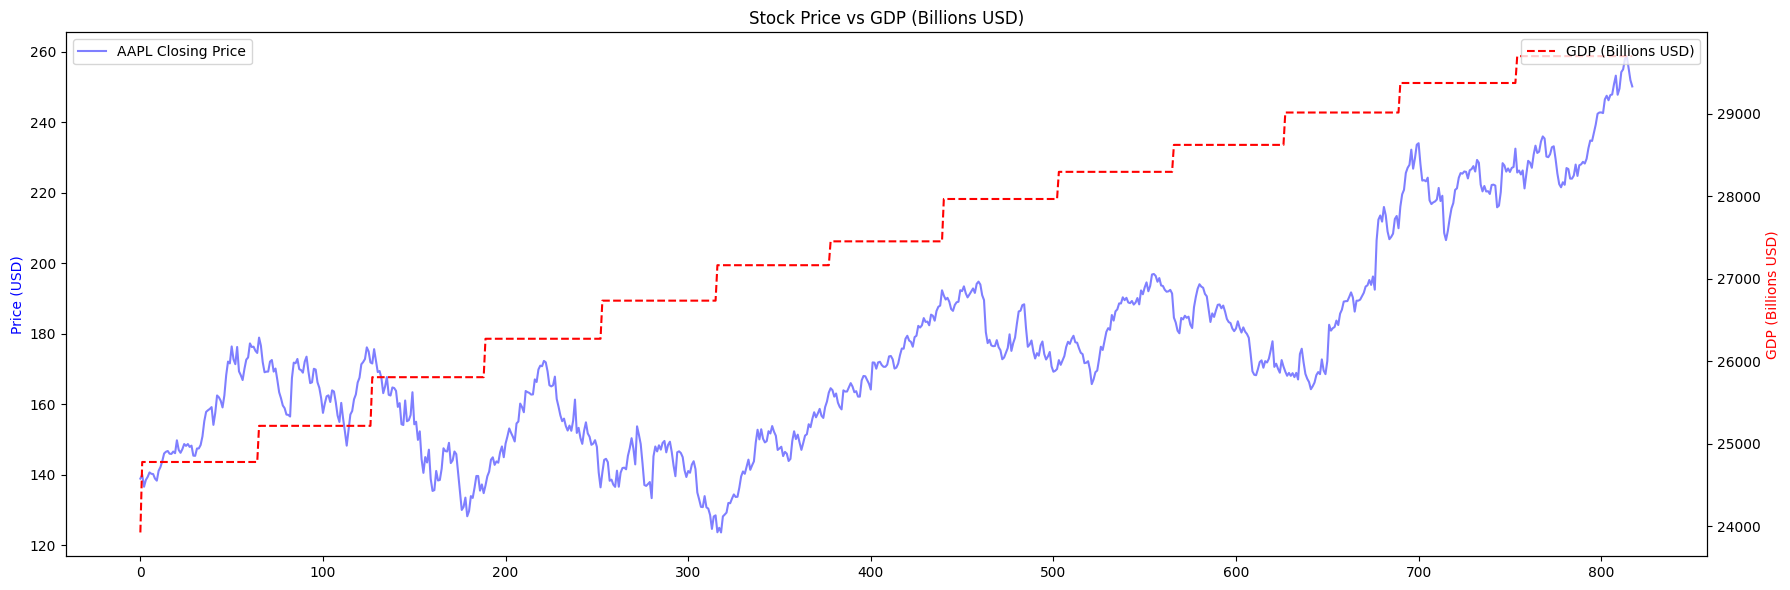

In [132]:
# Time-Series Visualization for trends in stock prices with macroeconomic factors
macro_vars = ['GDP (Billions USD)', 'Unemployment Rate (%)',
             'Consumer Confidence Index', 'Producer Price Index (PPI)']

# GDP
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(df['Close'], color='blue', alpha=0.5, label='AAPL Closing Price')
ax.set_ylabel('Price (USD)', color='blue')
ax2 = ax.twinx()
ax2.plot(df[macro_vars[0]], color='red', linestyle='--', label=macro_vars[0])
ax2.set_ylabel(macro_vars[0], color='red')
ax.set_title(f'Stock Price vs {macro_vars[0]}')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()


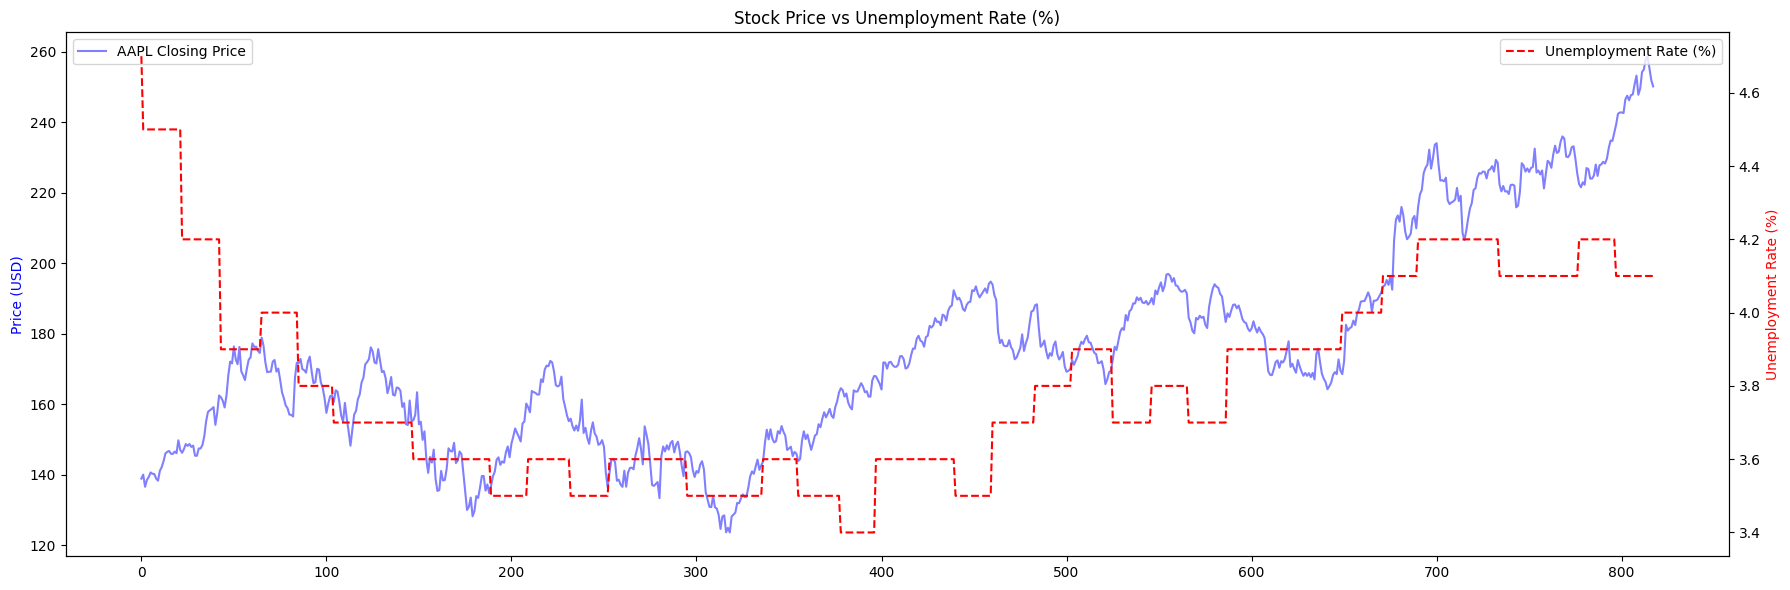

In [133]:
# Unemployment
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(df['Close'], color='blue', alpha=0.5, label='AAPL Closing Price')
ax.set_ylabel('Price (USD)', color='blue')
ax2 = ax.twinx()
ax2.plot(df[macro_vars[1]], color='red', linestyle='--', label=macro_vars[1])
ax2.set_ylabel(macro_vars[1], color='red')
ax.set_title(f'Stock Price vs {macro_vars[1]}')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

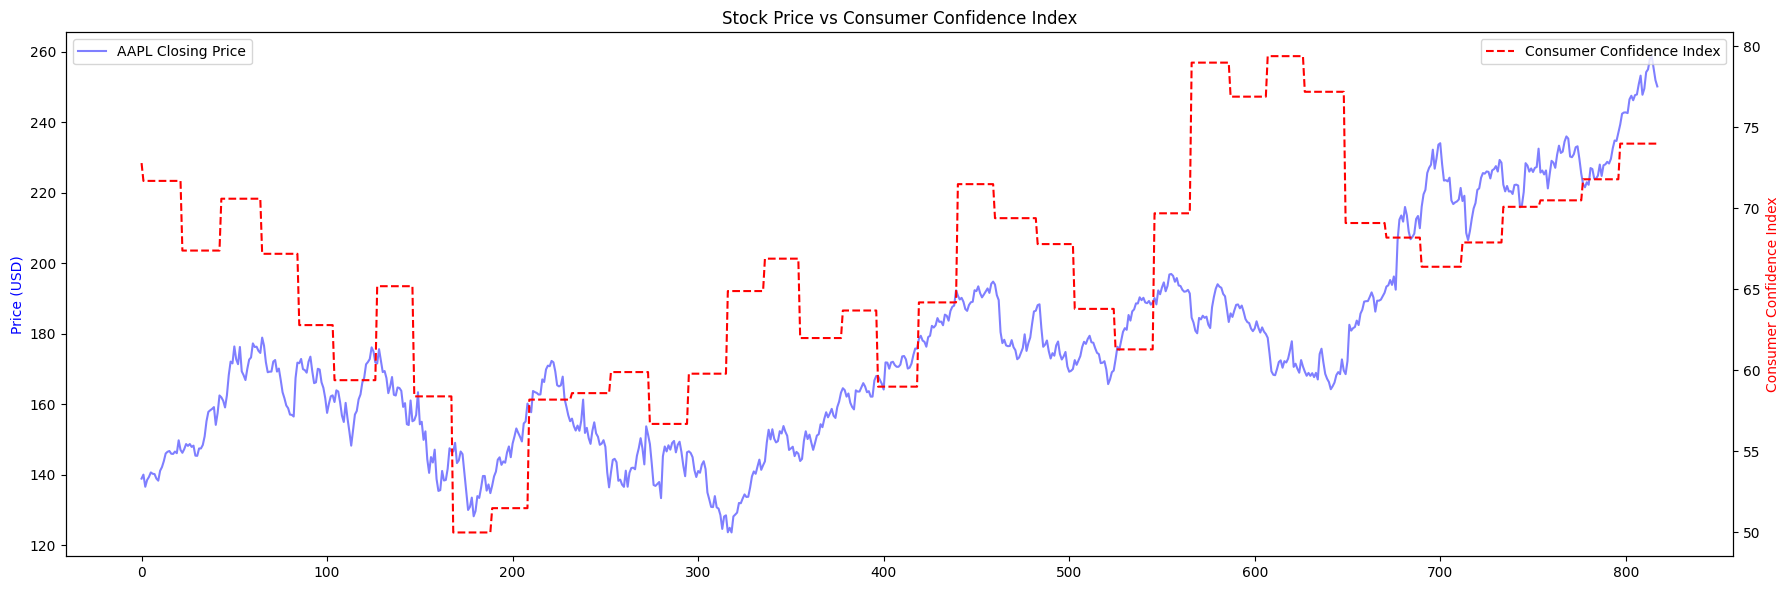

In [134]:
# Consumer Price Index
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(df['Close'], color='blue', alpha=0.5, label='AAPL Closing Price')
ax.set_ylabel('Price (USD)', color='blue')
ax2 = ax.twinx()
ax2.plot(df[macro_vars[2]], color='red', linestyle='--', label=macro_vars[2])
ax2.set_ylabel(macro_vars[2], color='red')
ax.set_title(f'Stock Price vs {macro_vars[2]}')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

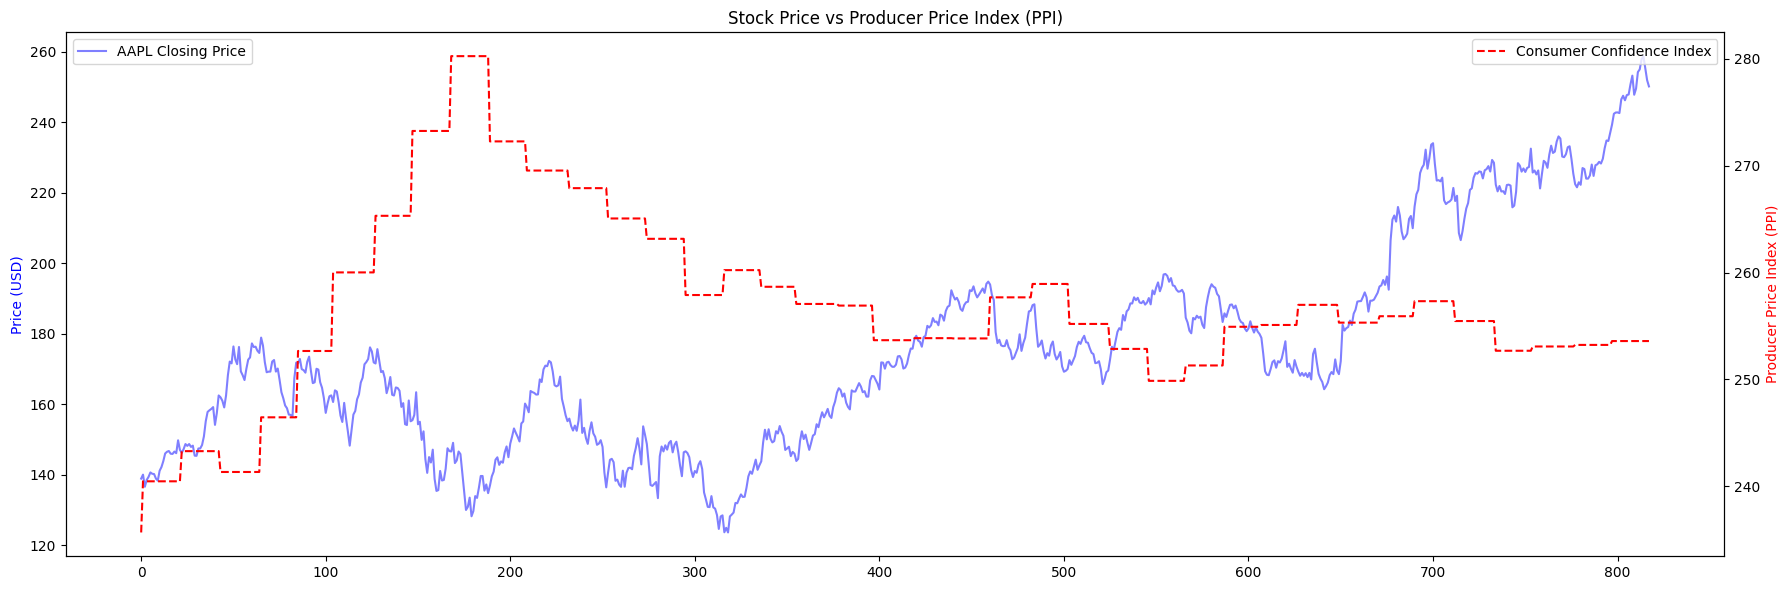

In [135]:
# Producer Price Index
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(df['Close'], color='blue', alpha=0.5, label='AAPL Closing Price')
ax.set_ylabel('Price (USD)', color='blue')
ax2 = ax.twinx()
ax2.plot(df[macro_vars[3]], color='red', linestyle='--', label=macro_vars[2])
ax2.set_ylabel(macro_vars[3], color='red')
ax.set_title(f'Stock Price vs {macro_vars[3]}')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

## Heatmaps


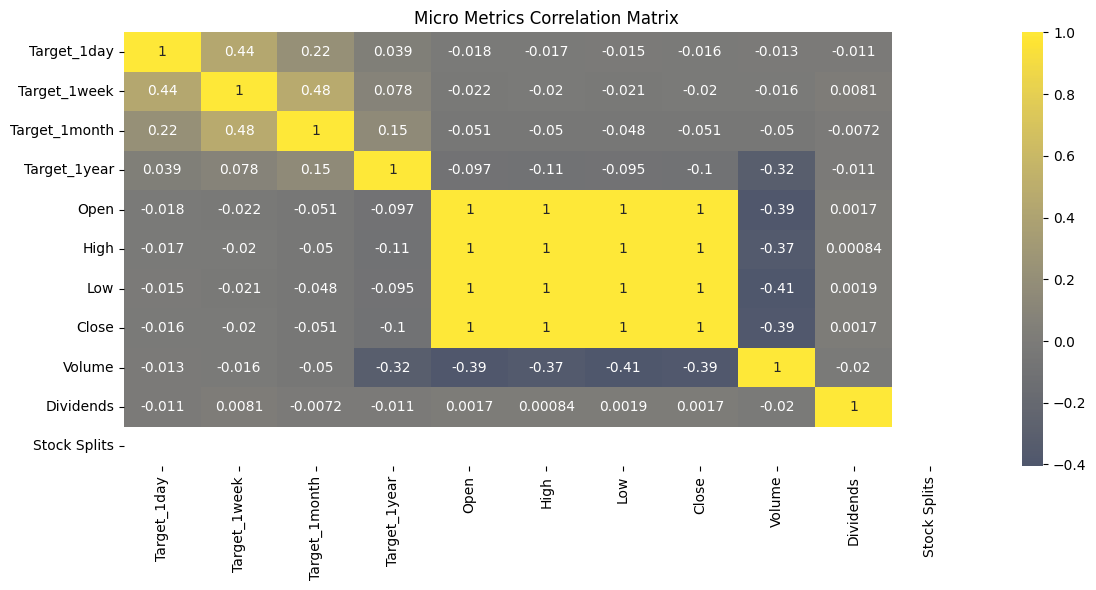

In [227]:
micro_features = [
    'Target_1day',
    'Target_1week',
    'Target_1month',
    'Target_1year',
    'Open',
    'High',
    'Low',
    'Close',
    'Volume',
    'Dividends',
    'Stock Splits',
]

plt.figure(figsize=(12,6))
sns.heatmap(df[micro_features].corr(), annot=True, cmap='cividis', center=0)
plt.title("Micro Metrics Correlation Matrix")
plt.tight_layout()
plt.show()

In [136]:
# Couldn't actually find these columns in the df, maybe they are named differently
# Return on Assets = Net Income / Total Assets
df['ROA'] = df['Net Income'] / df['Total Assets']

# Current Ratio = Current Assets / Current Liabilities
df['Current_Ratio'] = df['Current Assets'] / df['Current Liabilities']

# Calculate additional useful ratios
df['Debt_to_Equity'] = df['Total Debt'] / df['Stockholders Equity']
df['Gross_Margin'] = (df['Total Revenue'] - df['Cost Of Revenue']) / df['Total Revenue']
df['Operating_Margin'] = df['Operating Income'] / df['Total Revenue']


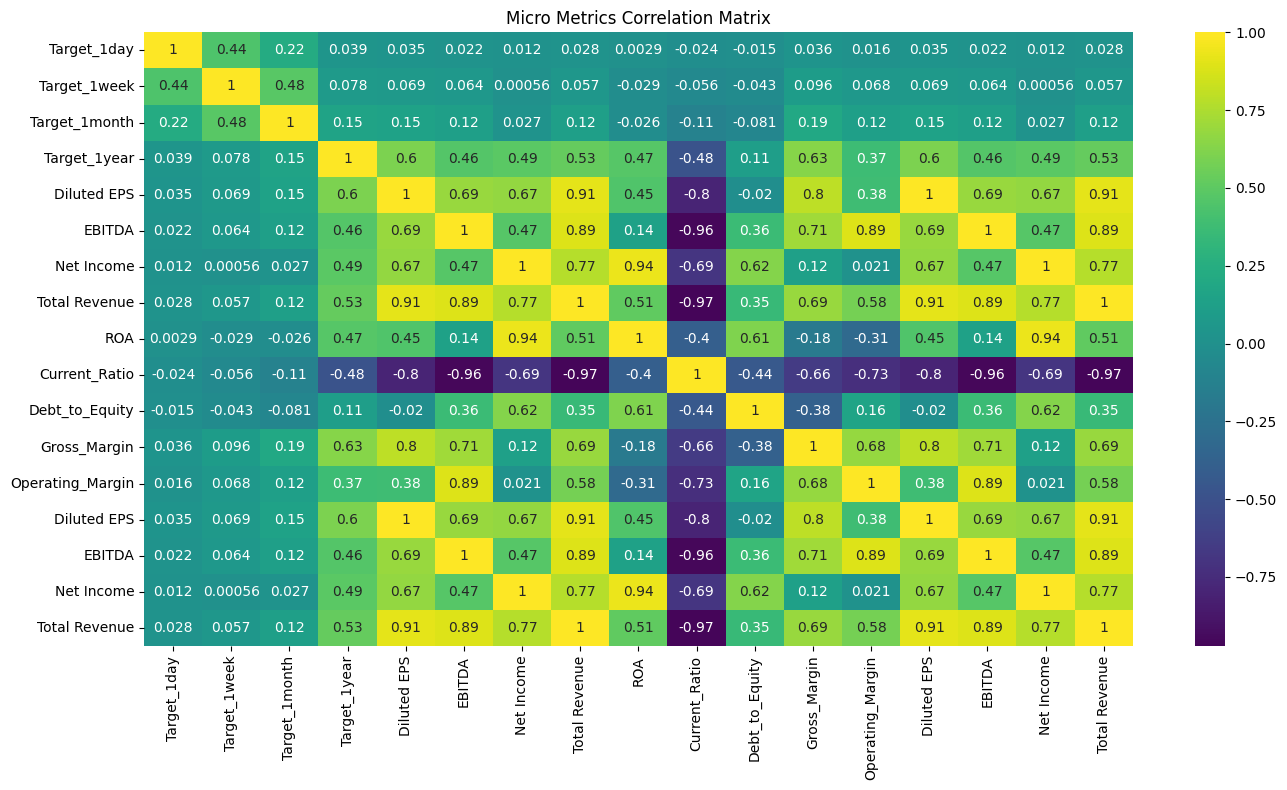

In [223]:
# Microeconomic with added columns Heatmap
micro_features = [
    'Target_1day',
    'Target_1week',
    'Target_1month',
    'Target_1year',
    'Diluted EPS',
    'EBITDA',
    'Net Income',
    'Total Revenue',
    'ROA',
    'Current_Ratio',
    'Debt_to_Equity',
    'Gross_Margin',
    'Operating_Margin',
    'Diluted EPS',
    'EBITDA',
    'Net Income',
    'Total Revenue',
]

plt.figure(figsize=(14,8))
sns.heatmap(df[micro_features].corr(), annot=True, cmap='viridis', center=0)
plt.title("Micro Metrics Correlation Matrix")
plt.tight_layout()
plt.show()

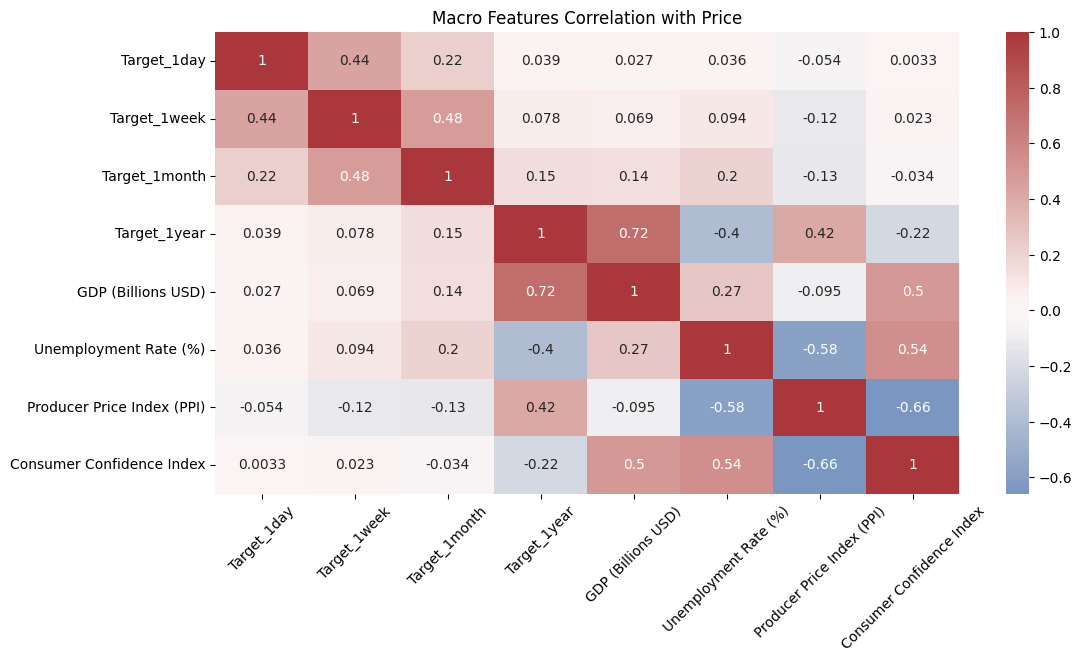

In [218]:
# Macroeconomic Heatmap
macro_features = [
    'Target_1day',
    'Target_1week',
    'Target_1month',
    'Target_1year',
    'GDP (Billions USD)',
    'Unemployment Rate (%)',
    'Producer Price Index (PPI)',
    'Consumer Confidence Index'
]

plt.figure(figsize=(12, 6))
sns.heatmap(df[macro_features].corr(), annot=True, cmap='vlag', center=0)
plt.title("Macro Features Correlation with Price")
plt.xticks(rotation=45)
plt.show()

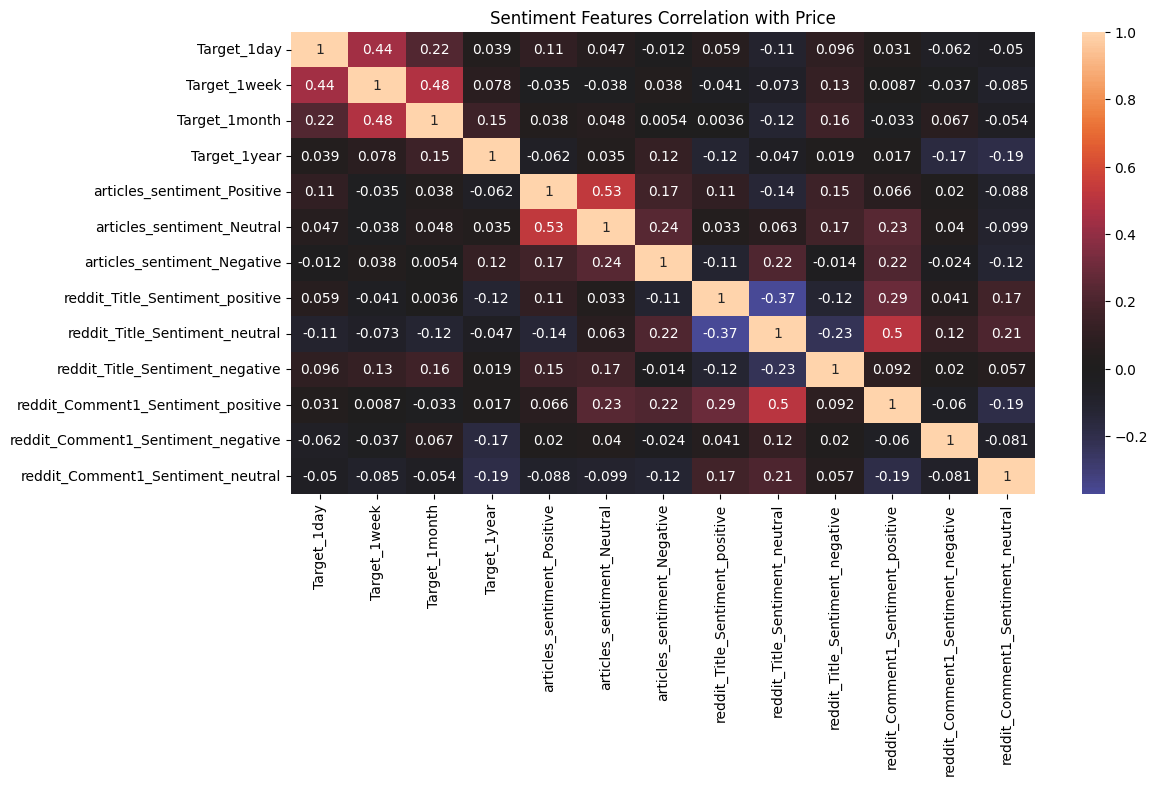

In [217]:
# Sentiment Correlation Heatmap
sentiment_features = [
    'Target_1day',
    'Target_1week',
    'Target_1month',
    'Target_1year',
    'articles_sentiment_Positive',
    'articles_sentiment_Neutral',
    'articles_sentiment_Negative',
    'reddit_Title_Sentiment_positive',
    'reddit_Title_Sentiment_neutral',
    'reddit_Title_Sentiment_negative',
    'reddit_Comment1_Sentiment_positive',
    'reddit_Comment1_Sentiment_negative',
    'reddit_Comment1_Sentiment_neutral',
]

plt.figure(figsize=(12, 6))
sns.heatmap(df[sentiment_features].corr(), annot=True, cmap='icefire', center=0)
plt.title("Sentiment Features Correlation with Price")
plt.xticks(rotation=90)
plt.show()


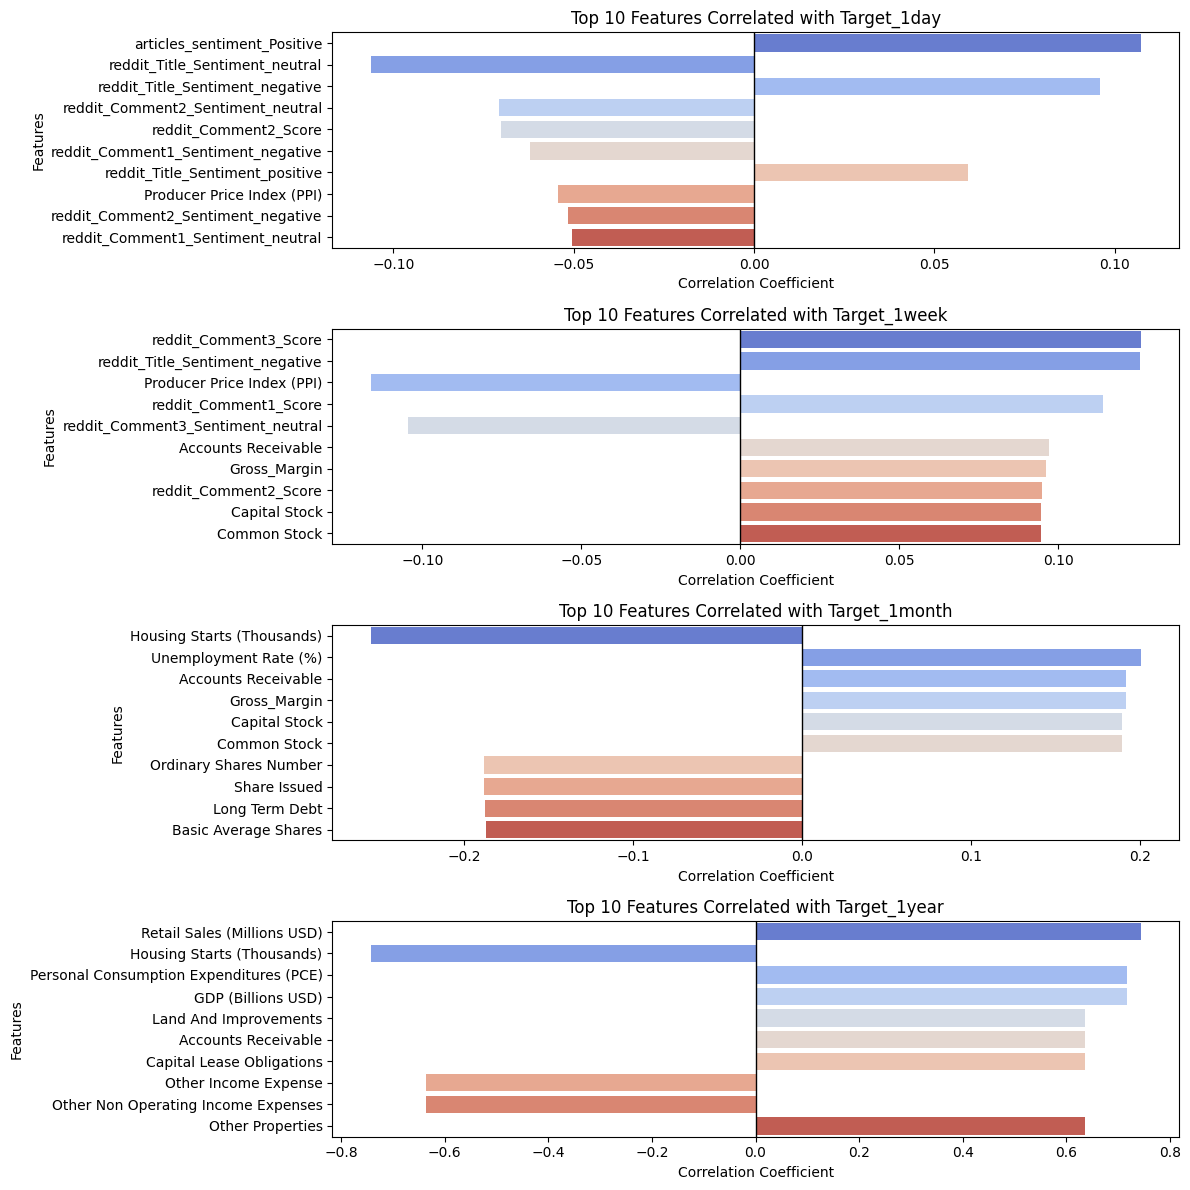

In [216]:
# 타겟 변수 설정
target_feature = ['Target_1day', 'Target_1week', 'Target_1month', 'Target_1year']

plt.figure(figsize=(12, 12))
for i in range(4):

  # Calculate Correlation
  correlation_values = df.corr()[target_feature[i]].drop(target_feature[i])

  # Exclude 'Target_'
  excluded_features = [col for col in df.columns if col.startswith("Target_") or col.startswith("Date")]
  filtered_correlation = correlation_values.drop(excluded_features, errors="ignore")

  # Top 10 correlation (abs)
  top_features = filtered_correlation.abs().nlargest(10).index
  top_correlations = filtered_correlation.loc[top_features]

  # Visualization
  plt.subplot(4, 1,i+1)
  sns.barplot(x=top_correlations.values, y=top_correlations.index, palette="coolwarm", hue =top_correlations.index)
  plt.axvline(0, color="black", linewidth=1)  # 0
  plt.xlabel("Correlation Coefficient")
  plt.ylabel("Features")
  plt.title(f"Top 10 Features Correlated with {target_feature[i]}")

plt.tight_layout()
plt.show()

## Distribution

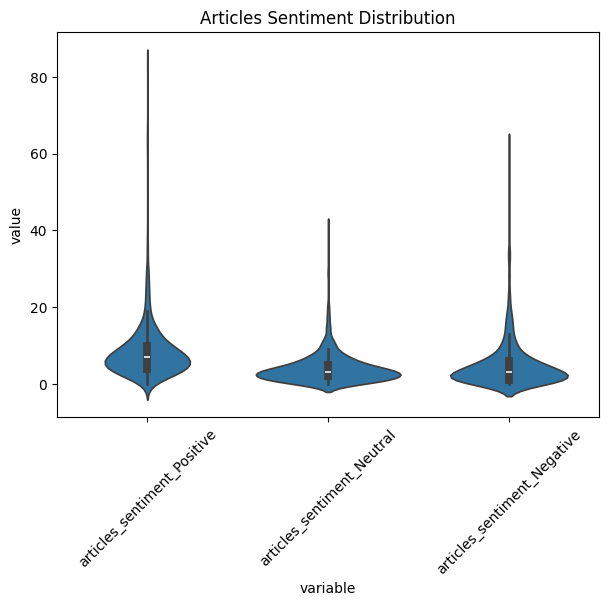

In [142]:
# Sentiment analysis distribution for articles
articles_sentiment = ['articles_sentiment_Positive',
                      'articles_sentiment_Neutral',
                      'articles_sentiment_Negative' ]

# Plot
plt.figure(figsize=(7, 5))
sns.violinplot(data=df[articles_sentiment].melt(), x='variable', y='value')
plt.title('Articles Sentiment Distribution')
plt.xticks(rotation=45)
plt.show()

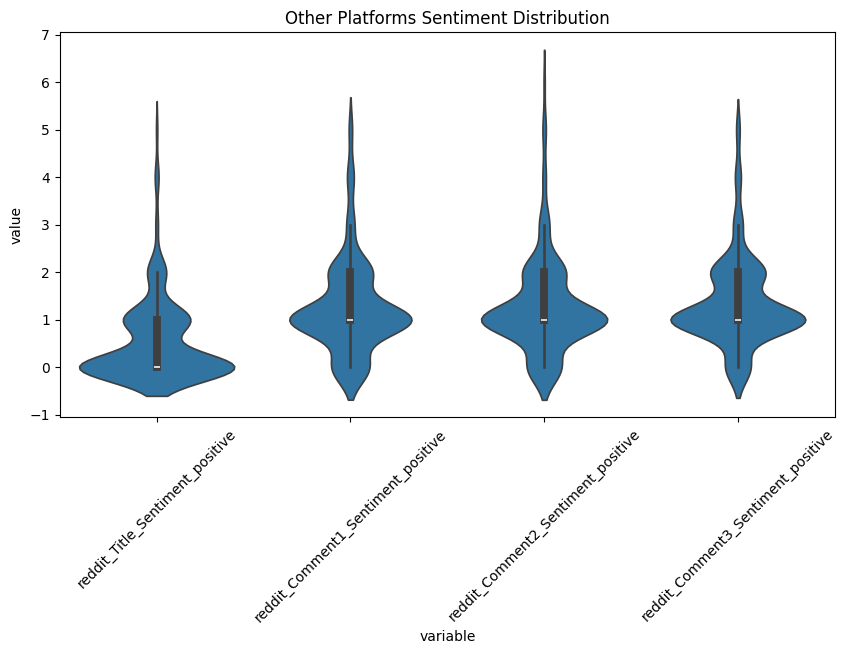

In [143]:
# Sentiment analysis distribution for Reddit
other_sentiments = [
    'reddit_Title_Sentiment_positive',
    'reddit_Comment1_Sentiment_positive',
    'reddit_Comment2_Sentiment_positive',
    'reddit_Comment3_Sentiment_positive'
]
plt.figure(figsize=(10, 5))
sns.violinplot(data=df[other_sentiments].melt(), x='variable', y='value')
plt.title('Other Platforms Sentiment Distribution')
plt.xticks(rotation=45)
plt.show()


## Sentiment lag analysis

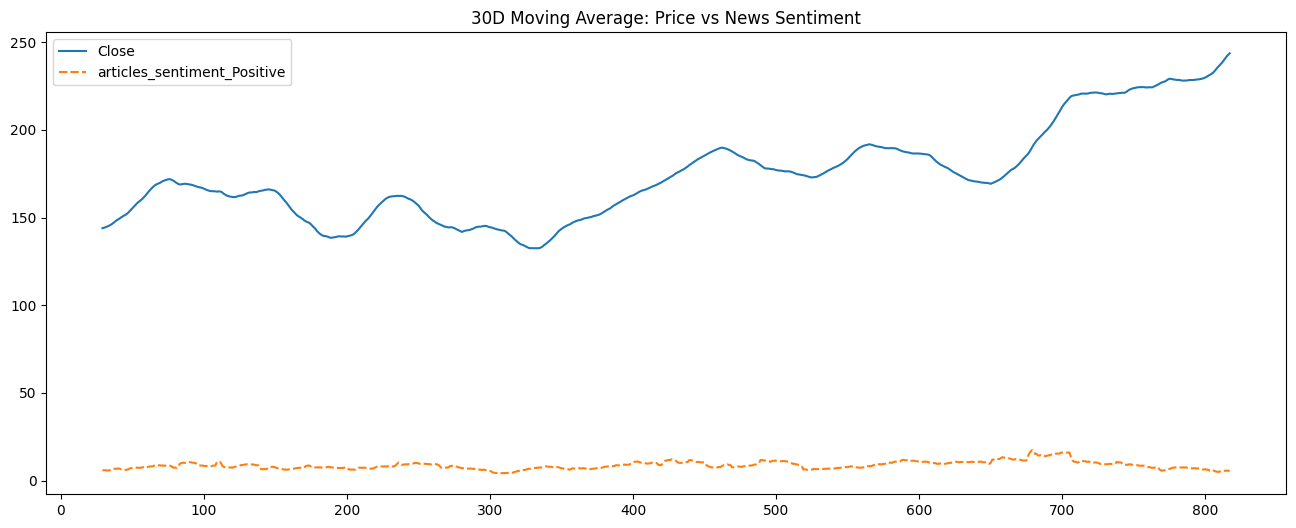

In [144]:
# Sentiment-Price Lag Analysis
fig, ax = plt.subplots(figsize=(16,6))
sns.lineplot(data=df[['Close','articles_sentiment_Positive']].rolling(30).mean(),
             ax=ax, legend='auto')
plt.title('30D Moving Average: Price vs News Sentiment')
plt.show()

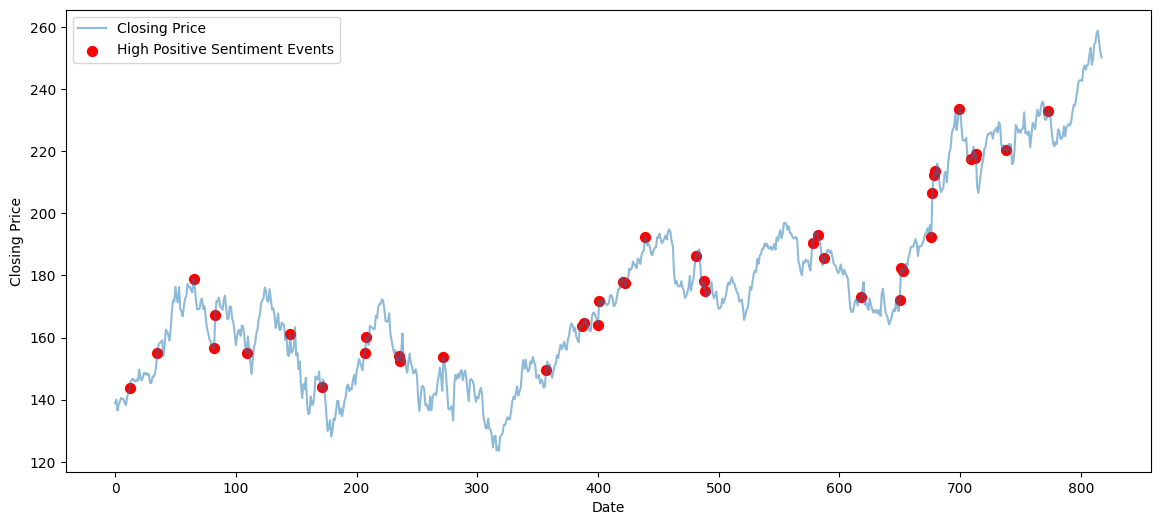

In [145]:
# # check to see if positive article sentiment coincided with stock change
event_dates = df[df['articles_sentiment_Positive'] > df['articles_sentiment_Positive'].quantile(0.95)].index

plt.figure(figsize=(14,6))
plt.plot(df['Close'], alpha=0.5, label='Closing Price')
plt.scatter(event_dates, df.loc[event_dates, 'Close'],
           c='red', s=50, label='High Positive Sentiment Events')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

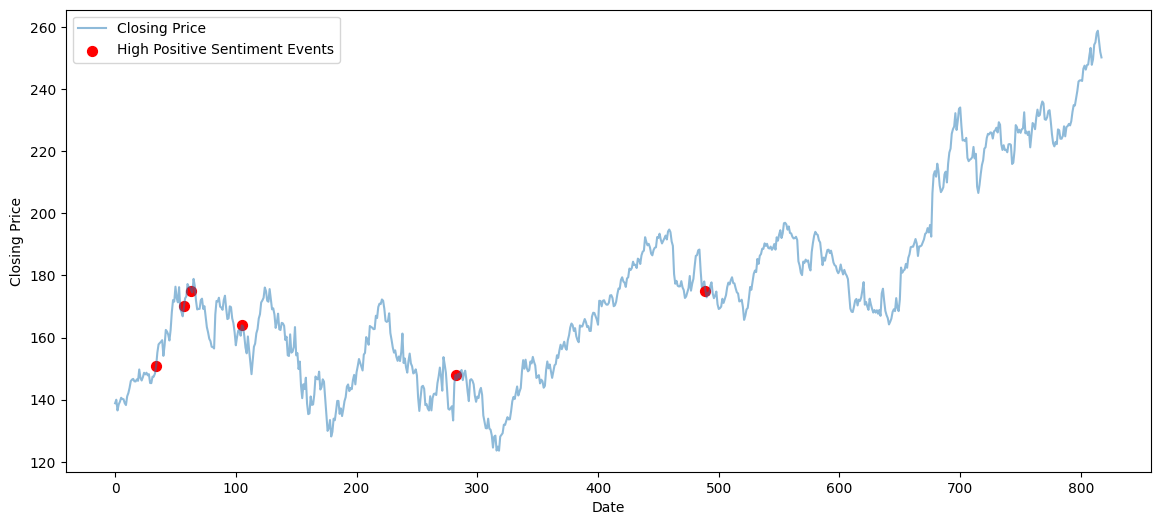

In [146]:
# # check to see if positive social media sentiment coincided with stock change
event_dates = df[df['reddit_Title_Sentiment_positive'] > df['reddit_Title_Sentiment_positive'].quantile(0.95)].index

plt.figure(figsize=(14,6))
plt.plot(df['Close'], alpha=0.5, label='Closing Price')
plt.scatter(event_dates, df.loc[event_dates, 'Close'],
           c='red', s=50, label='High Positive Sentiment Events')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()


## volatility

In [147]:
!pip install arch

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4124.298148263259
Iteration:      2,   Func. Count:     15,   Neg. LLF: 332637870057.0229
Iteration:      3,   Func. Count:     23,   Neg. LLF: 7597.144718068294
Iteration:      4,   Func. Count:     29,   Neg. LLF: 1551.988471139692
Iteration:      5,   Func. Count:     35,   Neg. LLF: 1634.313397141104
Iteration:      6,   Func. Count:     41,   Neg. LLF: 1560.7449444580707
Iteration:      7,   Func. Count:     47,   Neg. LLF: 1549.3683452810083
Iteration:      8,   Func. Count:     53,   Neg. LLF: 1548.1125852986565
Iteration:      9,   Func. Count:     58,   Neg. LLF: 1548.1115138813961
Iteration:     10,   Func. Count:     63,   Neg. LLF: 1548.1115069412494
Iteration:     11,   Func. Count:     67,   Neg. LLF: 1548.1115069431407
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1548.1115069412494
            Iterations: 11
            Function evaluations: 67
            Gradient evaluati

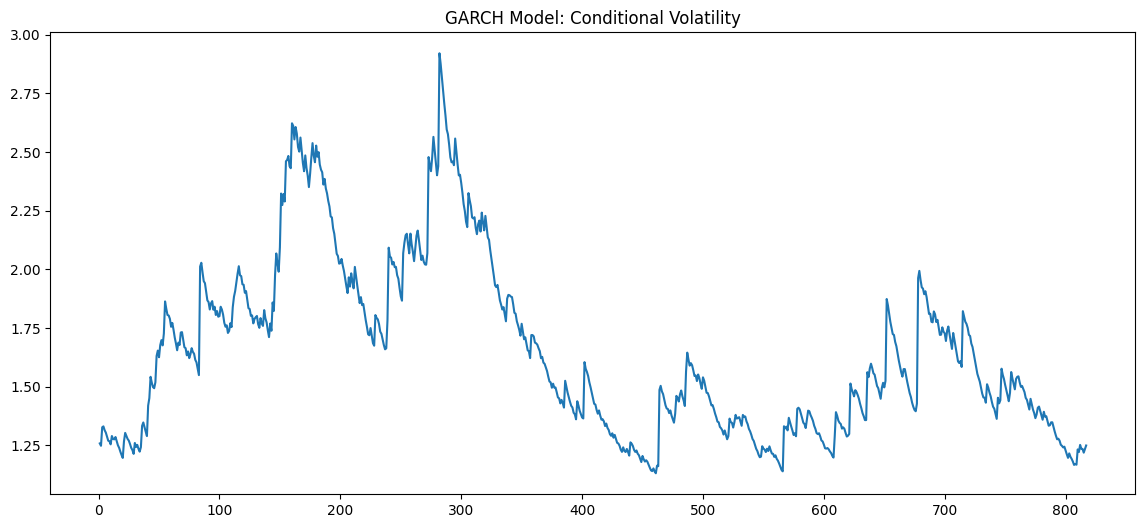

In [148]:
from arch import arch_model

returns = df['Close'].pct_change().dropna() * 100
am = arch_model(returns, vol='GARCH', p=1, q=1)
res = am.fit()

plt.figure(figsize=(14,6))
plt.plot(res.conditional_volatility)
plt.title('GARCH Model: Conditional Volatility')
plt.show()


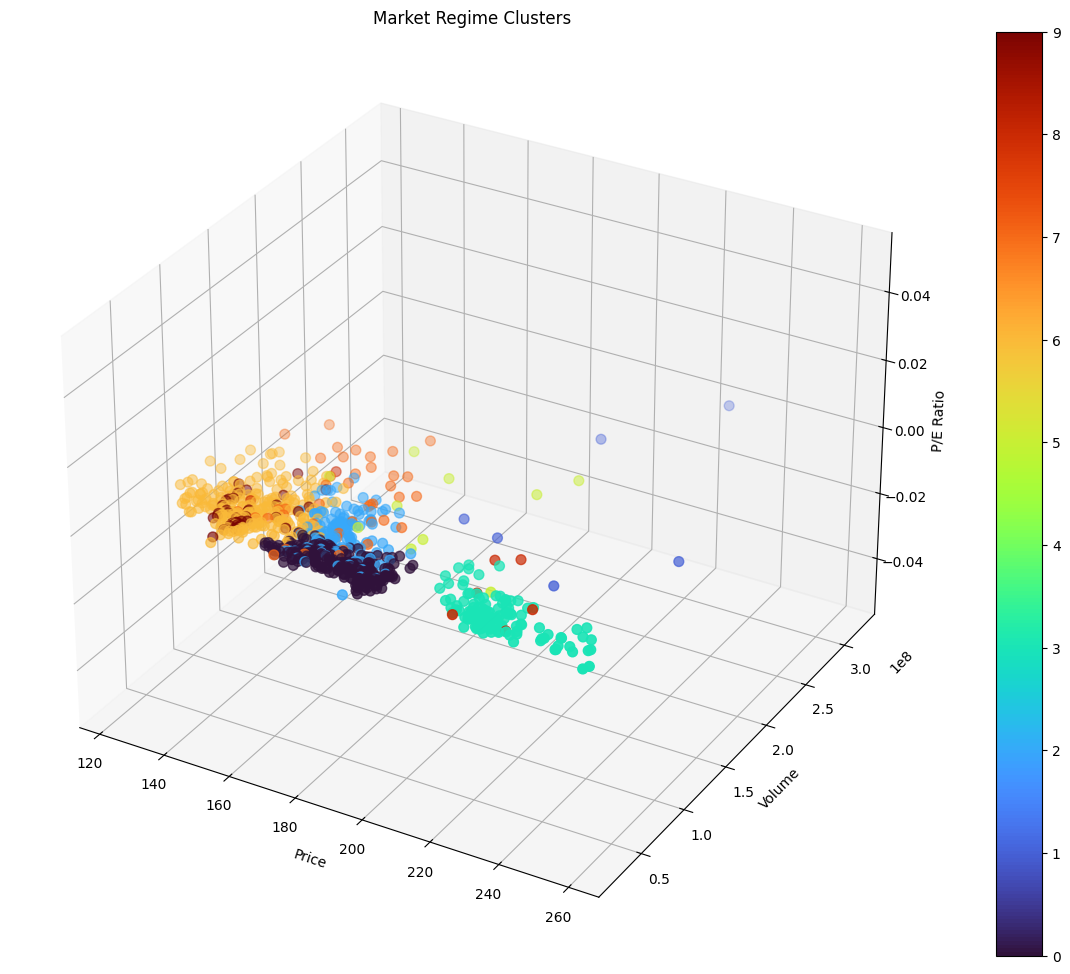

In [149]:
# Market Regime Clustering
from sklearn.preprocessing import RobustScaler
from sklearn.mixture import BayesianGaussianMixture

cluster_features = ['Close', 'Volume',
                   'articles_sentiment_Positive',
                   'Unemployment Rate (%)']

cluster_data = df[cluster_features].dropna()
scaler = RobustScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Bayesian GMM for automatic component selection
bgmm = BayesianGaussianMixture(n_components=10,
                              weight_concentration_prior=0.01)
df['Cluster'] = bgmm.fit_predict(scaled_data)

# 3D Visualization
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(cluster_data['Close'], cluster_data['Volume'],
                 c=df['Cluster'],
                cmap='turbo', s=50)
plt.title('Market Regime Clusters')
ax.set_xlabel('Price')
ax.set_ylabel('Volume')
ax.set_zlabel('P/E Ratio')
plt.colorbar(sc)
plt.show()


## outlier detection

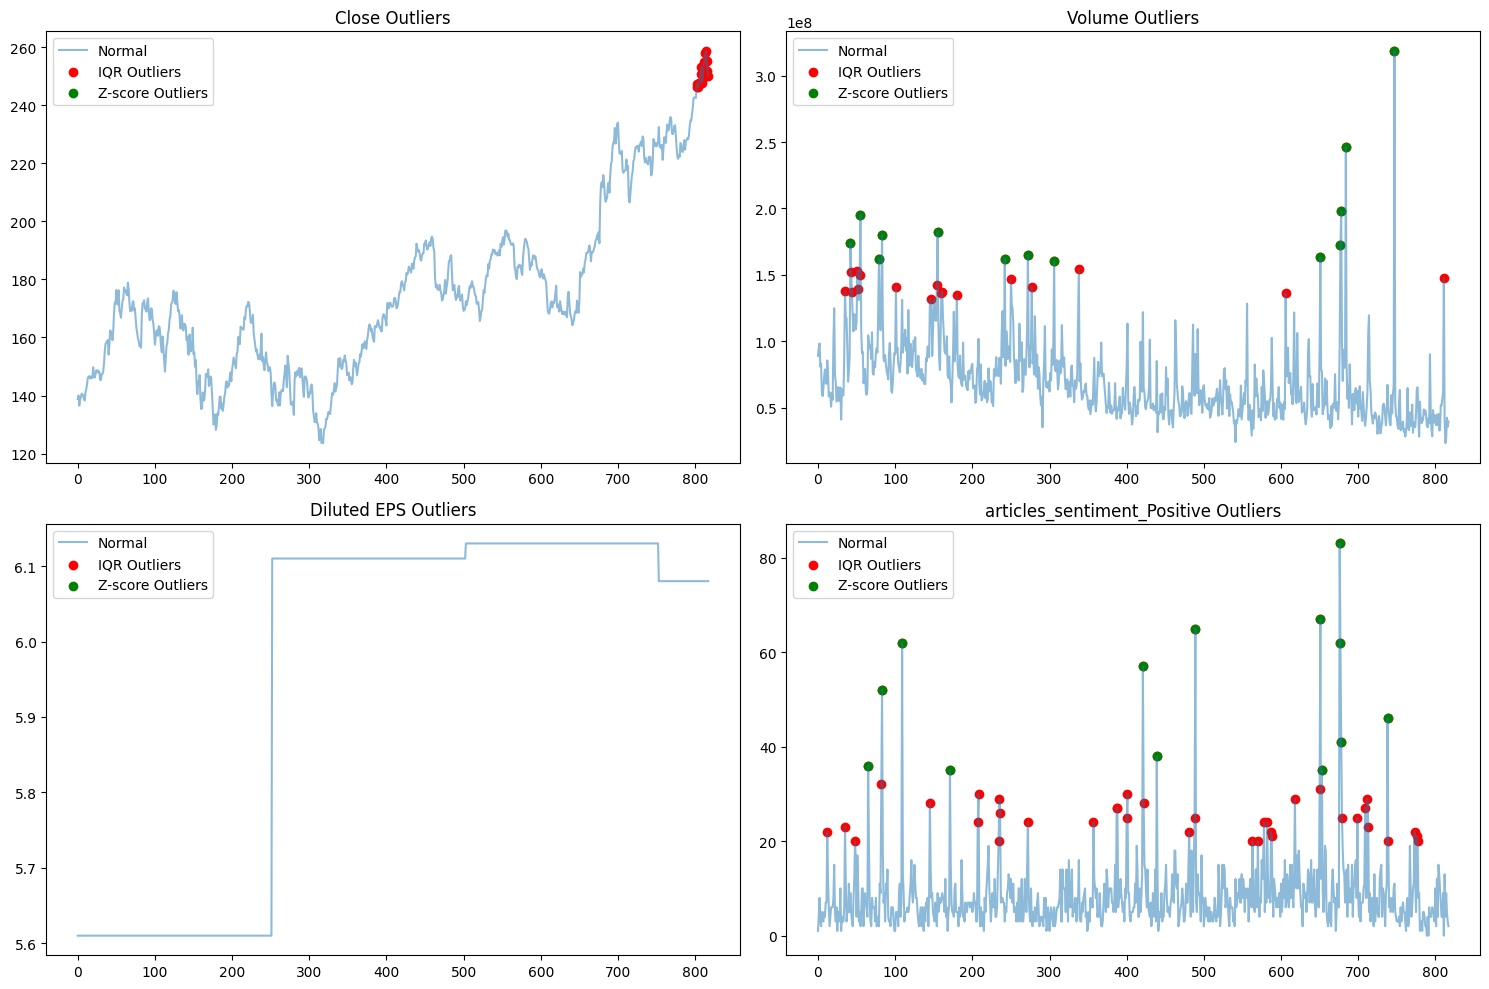

In [150]:
import numpy as np

# Outlier Detection
outlier_features = ['Close', 'Volume', 'Diluted EPS', 'articles_sentiment_Positive']

plt.figure(figsize=(15,10))
for i, col in enumerate(outlier_features, 1):
    plt.subplot(2,2,i)

    # IQR Method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    iqr_outliers = df[(df[col] < (Q1 - 1.5*IQR)) | (df[col] > (Q3 + 1.5*IQR))]

    # Z-score Method
    z_scores = np.abs((df[col] - df[col].mean())/df[col].std())
    z_outliers = df[z_scores > 3]

    plt.plot(df[col], alpha=0.5, label='Normal')
    plt.scatter(iqr_outliers.index, iqr_outliers[col], color='red', label='IQR Outliers')
    plt.scatter(z_outliers.index, z_outliers[col], color='green', label='Z-score Outliers')
    plt.title(f'{col} Outliers')
    plt.legend()

plt.tight_layout()
plt.show()


## PCA analysis

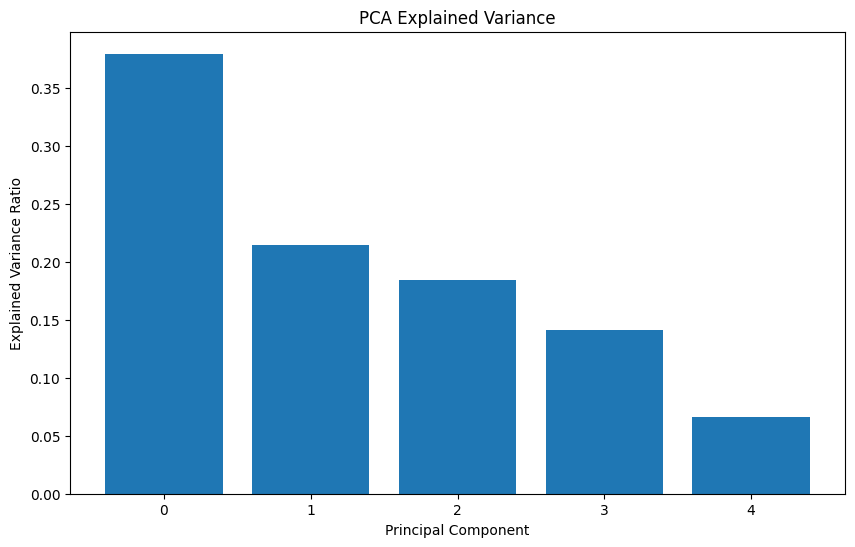

In [151]:
# PCA Analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selected features spanning price, macro/microeconomics, and sentiment
pca_features = [
    'Close',
    'GDP (Billions USD)', 'Unemployment Rate (%)',
    'Diluted EPS',
    'articles_sentiment_Positive', 'reddit_Title_Sentiment_positive'
]

pca_data = df[pca_features].dropna()

# Standardization to equalize feature scales
scaler = StandardScaler()
scaled_pca = scaler.fit_transform(pca_data)

# PCA retaining 95% variance
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(scaled_pca)

# Variance Explained
plt.figure(figsize=(10,6))
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.show()


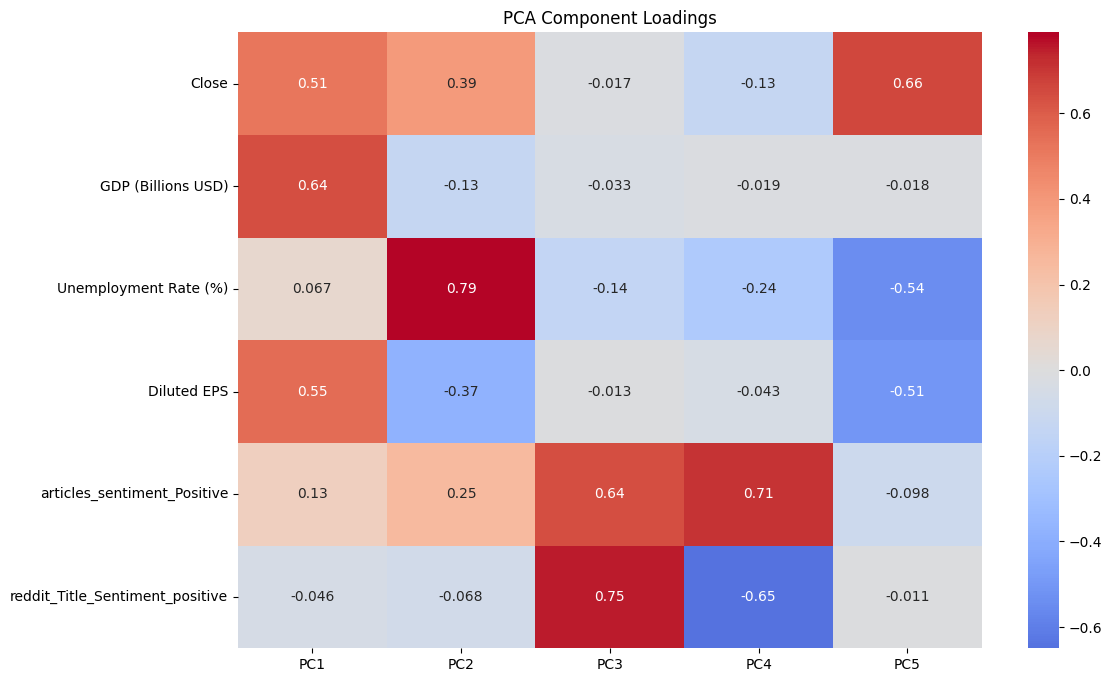

In [152]:
# Component Loadings
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i}' for i in range(1, pca.n_components_+1)],
                        index=pca_features)

plt.figure(figsize=(12,8))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Component Loadings')
plt.show()

# Feature Engineering

# Feature Selection

# Model Development

# Model Evaluation